<a href="https://colab.research.google.com/github/DieryVale/Creado-con-Colab-vino-Autent-billetes/blob/main/Autenticacion_de_billetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autenticación de billetes**


Información del conjunto de datos
información adicional

Los datos se extrajeron de imágenes tomadas de especímenes similares a billetes genuinos y falsificados. Para la digitalización se utilizó una cámara industrial habitualmente utilizada para la inspección de impresiones. Las imágenes finales tienen 400x 400 píxeles. Debido a la lente del objeto y a la distancia al objeto investigado, se obtuvieron imágenes en escala de grises con una resolución de aproximadamente 660 dpi. Se utilizó la herramienta Wavelet Transform para extraer características de las imágenes.  




**Descripción del Conjunto de Datos:**
El conjunto de datos de autenticación de billetes contiene 1372 instancias y 5 atributos, incluyendo una variable objetivo. Las características fueron extraídas de imágenes de billetes mediante una transformación por wavelets.

Número de Instancias: 1372
Número de Atributos: 5 (4 características y 1 clase)
Atributos:
Varianza (variance): Desviación respecto a la media.
Sesgo (skewness): Medida de la asimetría de la distribución.
Curtosis (curtosis): Medida de la "peakedness" de la distribución.
Entropía (entropy): Medida del desorden o la imprevisibilidad.
Clase (class): Variable binaria (0 = falso, 1 = auténtico).

In [13]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates

# Cargar los datos desde la URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
columnas = ['varianza', 'sesgo', 'curtosis', 'entropía', 'clase']
datos = pd.read_csv(url, header=None, names=columnas)

# Mostrar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(datos.head())

# Describir las estadísticas básicas del conjunto de datos
print("\nDescripción estadística del conjunto de datos:")
print(datos.describe())




Primeras filas del conjunto de datos:
   varianza   sesgo  curtosis  entropía  clase
0   3.62160  8.6661   -2.8073  -0.44699      0
1   4.54590  8.1674   -2.4586  -1.46210      0
2   3.86600 -2.6383    1.9242   0.10645      0
3   3.45660  9.5228   -4.0112  -3.59440      0
4   0.32924 -4.4552    4.5718  -0.98880      0

Descripción estadística del conjunto de datos:
          varianza        sesgo     curtosis     entropía        clase
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.

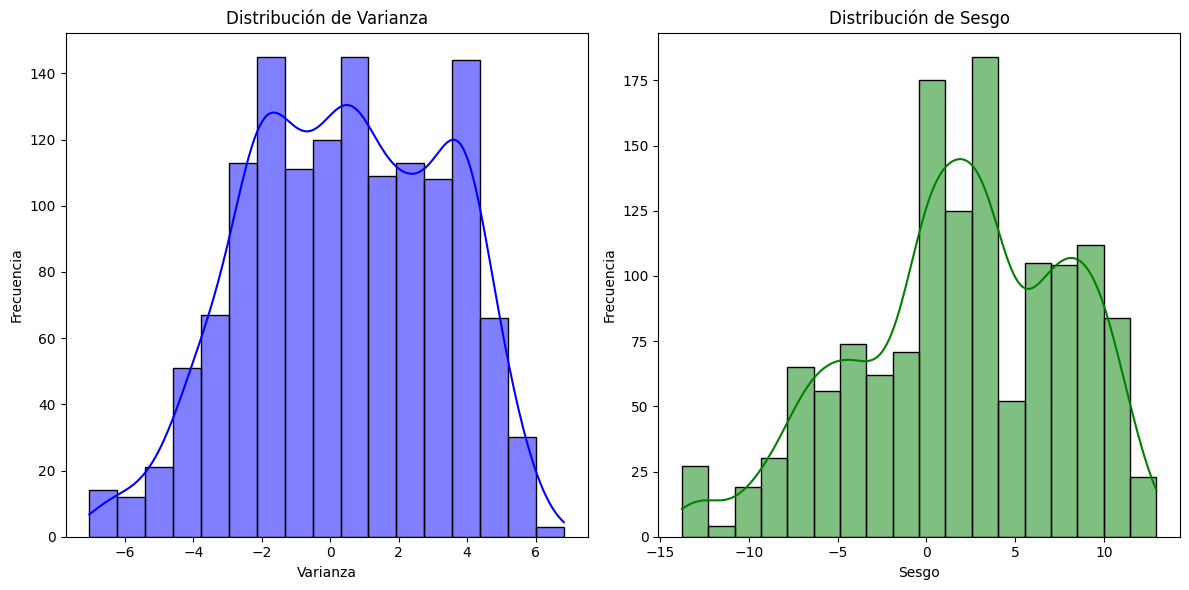

In [14]:
# Histograma para la variable 'varianza'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(datos['varianza'], kde=True, color='blue')
plt.title('Distribución de Varianza')
plt.xlabel('Varianza')
plt.ylabel('Frecuencia')

# Histograma para la variable 'sesgo'
plt.subplot(1, 2, 2)
sns.histplot(datos['sesgo'], kde=True, color='green')
plt.title('Distribución de Sesgo')
plt.xlabel('Sesgo')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

Distribución de Varianza:

Unimodalidad/Bimodalidad: La distribución de la varianza parece unimodal, con un único pico pronunciado.
Simetría: La distribución de la varianza muestra una ligera asimetría hacia la derecha (positiva), lo que indica que hay una cola extendida hacia valores mayores.
Distribución de Sesgo:

Unimodalidad/Bimodalidad: La distribución del sesgo parece ser bimodal, con dos picos distintos.
Simetría: La distribución del sesgo es más simétrica alrededor de sus picos, aunque puede tener una ligera asimetría dependiendo de la magnitud de los picos.

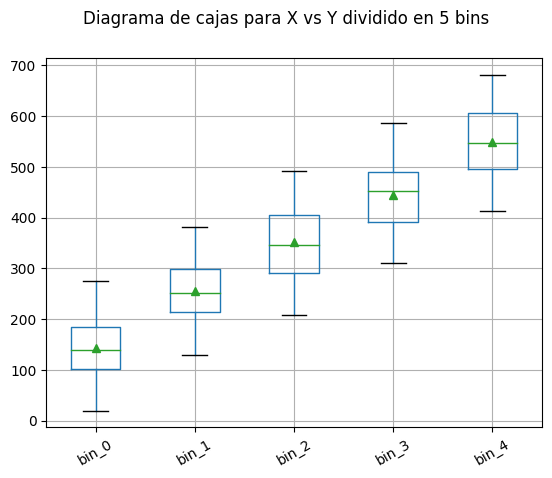

In [15]:
# Genera datos ficticios
np.random.seed(0)
MAX = 500
BINS = 5
STEP = int(MAX / BINS)
SCALE = 200
xx = [x for x in range(0, MAX)]
yy = [round(y + SCALE * np.random.rand(), 2) for y in range(0, MAX)]
data = {'X': xx, 'Y': yy}
df = pd.DataFrame.from_dict(data)

# Divide los datos en 5 bins
COLS = ['bin_' + str(x) for x in range(BINS)]
df2 = pd.DataFrame(columns=COLS)
for i in range(BINS):
    start = STEP * i
    stop = STEP * (i + 1)
    label = 'bin_' + str(i)
    x = df.iloc[start:stop]['X']
    y = df.iloc[start:stop]['Y']
    df2[label] = list(y)

# Crea el diagrama de cajas
plt.figure()
plt.suptitle("Diagrama de cajas para X vs Y dividido en 5 bins")
ax = plt.gca()
df2.boxplot(showmeans=True)
for tick in ax.get_xticklabels():
    tick.set_rotation(30)

plt.show()

**Para determinar qué variables tienen la mayor correlación :** podemos observar tanto los gráficos de dispersión como la matriz de correlación.

En los gráficos de dispersión, podemos buscar patrones visuales que indiquen una relación lineal entre las variables. Si hay una fuerte correlación entre dos variables, esperaríamos ver una relación clara en los gráficos de dispersión, como una tendencia lineal o agrupaciones de puntos alrededor de una línea.

Además, podemos consultar la matriz de correlación, que nos proporciona valores numéricos que indican la fuerza y dirección de la relación entre las variables. Los valores de correlación están en el rango de -1 a 1, donde:

1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica falta de correlación lineal.

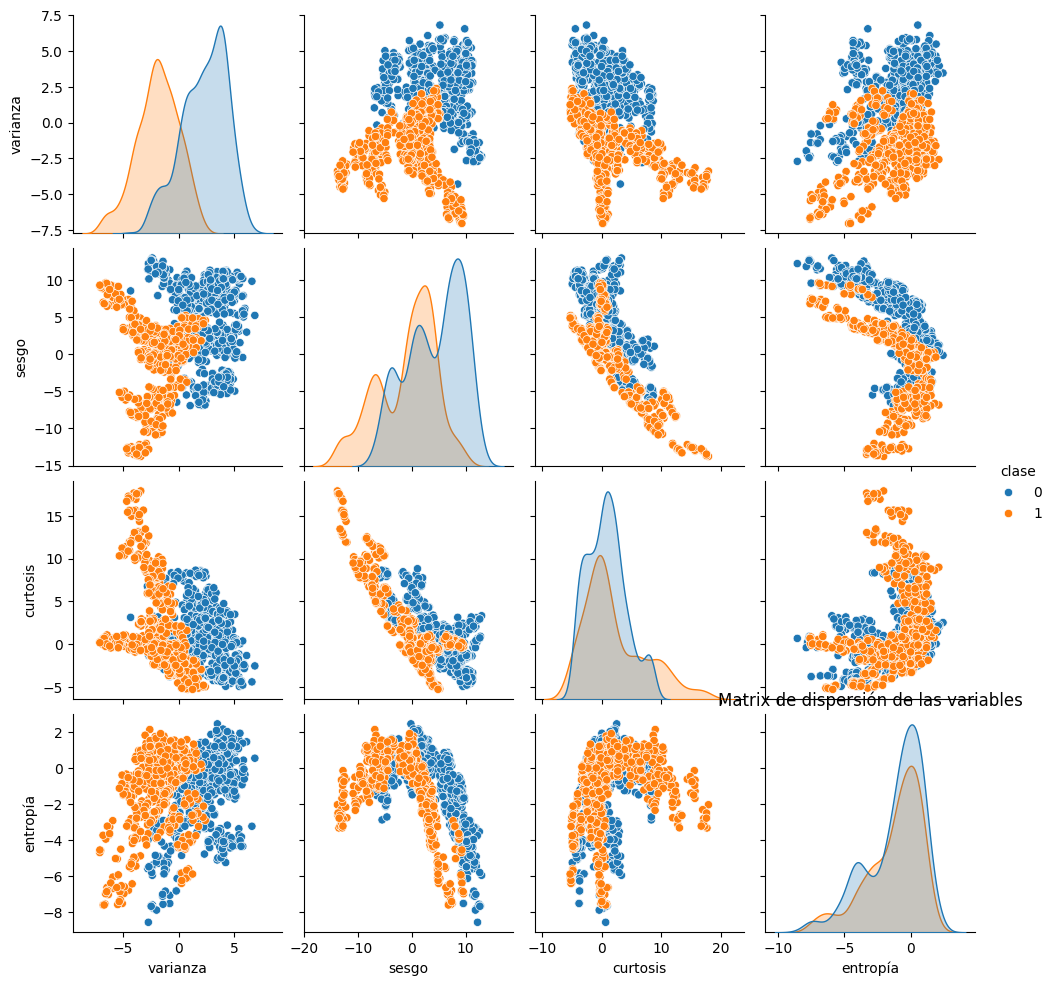

Matriz de correlación entre las variables:
          varianza     sesgo  curtosis  entropía     clase
varianza  1.000000  0.264026 -0.380850  0.276817 -0.724843
sesgo     0.264026  1.000000 -0.786895 -0.526321 -0.444688
curtosis -0.380850 -0.786895  1.000000  0.318841  0.155883
entropía  0.276817 -0.526321  0.318841  1.000000 -0.023424
clase    -0.724843 -0.444688  0.155883 -0.023424  1.000000


In [16]:
# Matrix de dispersión
sns.pairplot(datos, hue='clase')
plt.title('Matrix de dispersión de las variables')
plt.show()

# Matriz de correlación
correlacion = datos.corr()
print("Matriz de correlación entre las variables:")
print(correlacion)

Este código genera un gráfico de pares paralelos que muestra cómo se distribuyen las características de los billetes genuinos y falsificados en el conjunto de datos. Cada línea representa un billete, y las líneas genuinas y falsas se muestran con diferentes colores. Esto permite visualizar las relaciones entre múltiples variables simultáneamente.

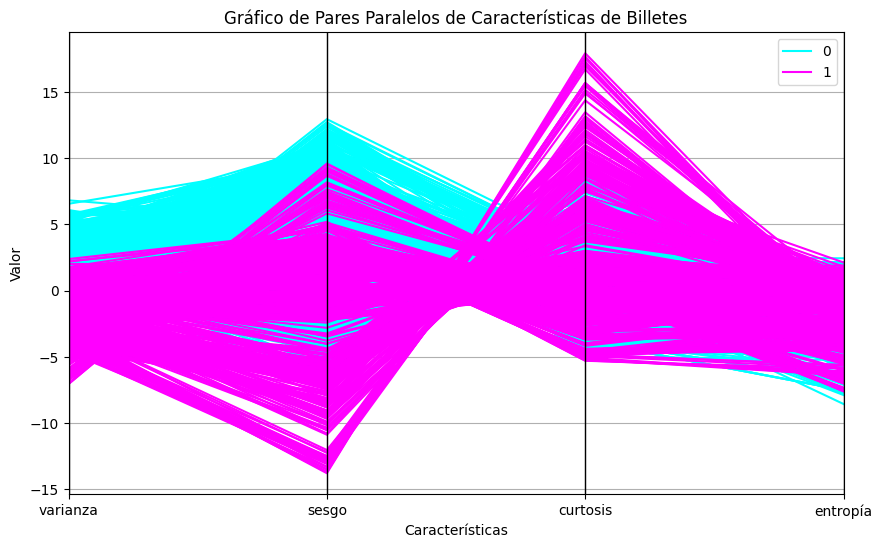

In [17]:
# Gráfico de pares paralelos
plt.figure(figsize=(10,6))
parallel_coordinates(datos, 'clase', colormap='cool')
plt.title('Gráfico de Pares Paralelos de Características de Billetes')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.legend(loc='upper right')
plt.show()